# AIQDSC27 –Machine Learning Algorithms Nicola Ronzoni 


The final goal of the project is to develop a model that combine no-text info (numeric and categorical variables) and text-info (doctor's reports), that predict re-hospitalization. To simplify the problem I use as target variable the OUTPUT_LABEL 0 if the patient will not be re-hospitalized 1 if the patient will be re-hospitalized, the reason of this choice will be explained later. I will develop more than one model and try to select the best one on the basis of metrics for classification problem. 

<h2>The project have different sections:<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load,-inspect-and-filter-the-data" data-toc-modified-id="Load, inspect and filter the data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load, inspect and filter the data</a></span></li><li><span><a href="#Normalization-of-the-text" data-toc-modified-id="Normalization of the text"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalization of the text</a></span></li><li><span><a href="#Treatment-of-datetime-variable" data-toc-modified-id="Treatment of datetime variable"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treatment of datetime variable</a></span></li><li><span><a href="#Convertion-of-categorical-variables-in-numeric-ones" data-toc-modified-id="Convertion of categorical variables into numeric ones"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convertion of categorical variables into numeric ones</a></span></li><li><span><a href="#Creation-of-the-dataset-for-the-models" data-toc-modified-id="Creation of the dataset for the models"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creation of the dataset for the models</a></span></li><li><span><a href="#Definition-of-the-target" data-toc-modified-id="Target variable for the models"><span class="toc-item-num">6&nbsp;&nbsp;</span>Target variable for the models</a></span></li><li><span><a href="#Treatment-of-Normalized-text" data-toc-modified-id="Convertion of normalized text information"><span class="toc-item-num">7&nbsp;&nbsp;</span>Convertion of normalized text information</a></span></li><li><span><a href="#Feature-selection-for-the-models" data-toc-modified-id="Feature selection for the models"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature selection for the models</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models"><span class="toc-item-num">9&nbsp;&nbsp;</span>Models</a></span></li>
<li><span><a href="#Evaluation-of-the-metrics-and-conclusion" data-toc-modified-id="Evaluation of the metrics and conclusion"><span class="toc-item-num">10&nbsp;&nbsp;</span>Evaluation of the metrics and conclusion</a></span></li>

## Load, inspect and filter the data   


In [1]:
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import train and test sets
df_train = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/train.csv.zip")
df_test = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/test.csv.zip")


df_train.head()


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
0,937,148592,2163-01-20 18:39:00,2163-01-24 08:00:00,0.061806,2163-01-24 09:29:00,EMERGENCY,2163-01-26 08:00:00,DEAD/EXPIRED,Medicare,...,0,0,0,0,1,0,0,0,0,1
1,3016,159142,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,2,0,0,0,0,0,0,1,0,0
2,2187,186282,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,Medicaid,...,1,2,1,0,3,0,0,4,0,0
3,19213,140312,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,EMERGENCY,NaN,HOME,Medicare,...,0,0,0,0,0,0,0,1,1,1
4,425,118058,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,0,0,0,0,0,0,0,2,1,0


In [3]:
#shape of the train and test set
df_train.shape, df_test.shape

((2000, 34), (901, 34))

In [4]:
#Number of non-Nan values per variable in train test 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SUBJECT_ID          2000 non-null   int64  
 1   HADM_ID             2000 non-null   int64  
 2   ADMITTIME           2000 non-null   object 
 3   DISCHTIME           2000 non-null   object 
 4   DAYS_NEXT_ADMIT     1210 non-null   float64
 5   NEXT_ADMITTIME      1210 non-null   object 
 6   ADMISSION_TYPE      2000 non-null   object 
 7   DEATHTIME           158 non-null    object 
 8   DISCHARGE_LOCATION  2000 non-null   object 
 9   INSURANCE           2000 non-null   object 
 10  MARITAL_STATUS      1924 non-null   object 
 11  ETHNICITY           2000 non-null   object 
 12  DIAGNOSIS           1998 non-null   object 
 13  TEXT                1925 non-null   object 
 14  GENDER              2000 non-null   object 
 15  DOB                 2000 non-null   object 
 16  blood 

In [5]:
#number of non-Nan values in the test set 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SUBJECT_ID          901 non-null    int64  
 1   HADM_ID             901 non-null    int64  
 2   ADMITTIME           901 non-null    object 
 3   DISCHTIME           901 non-null    object 
 4   DAYS_NEXT_ADMIT     526 non-null    float64
 5   NEXT_ADMITTIME      526 non-null    object 
 6   ADMISSION_TYPE      901 non-null    object 
 7   DEATHTIME           58 non-null     object 
 8   DISCHARGE_LOCATION  901 non-null    object 
 9   INSURANCE           901 non-null    object 
 10  MARITAL_STATUS      861 non-null    object 
 11  ETHNICITY           901 non-null    object 
 12  DIAGNOSIS           901 non-null    object 
 13  TEXT                871 non-null    object 
 14  GENDER              901 non-null    object 
 15  DOB                 901 non-null    object 
 16  blood   

Looking for Nan. 


From this preliminary inspection I can see that Nan values are really common in DEATHTIME, followed by NEXT_ADMITTIME and DAYS_NEXT_ADMIT in both test and train set 

Since I would like to predict re-hospitalization, I delete observation of death patient in order to avoid data leakage. 
I would like to obtain a model that works with alive patients. If I train the model considering also death patients this additional information can allow the model to learn or know something that it otherwise would not know.


In [6]:
# keep patients in which Deathtime equal to Nan in train and test set 
df_train=df_train[df_train['DEATHTIME'].isna()]
df_test=df_test[df_test['DEATHTIME'].isna()]

In [7]:
df_train.shape, df_test.shape

((1842, 34), (843, 34))

I deleted 158 observation from the train set and 58 observation from the test set 

Another thing to do in order to develop a good model is to delete the observation of patient that are re-hospitalized after more than one year. If I look at the distribution of the DAYS_NEXT_ADMIT I have more than 90% of the re-hospitalization before one year of time. After one year it is possible that the past medical history of the patient affect less the re-hospitalization rate. In addition exogenous variable can influence the final output (car accident, broken leg ...). By doing that I reduce the area of the prediction to one year time after the last re-hospitalization but I reduce the impact of exogenous variable on the prediction.  

In [8]:
#look at the 90th percentile of DAYS_NEXT_ADMIT in train and test set 
df_train['DAYS_NEXT_ADMIT'].quantile(0.90), df_test['DAYS_NEXT_ADMIT'].quantile(0.90)


(208.11277777777795, 122.87708333333332)

In [9]:
#delete observation of the patient for which the time passed between the last two hospitalization is greater than one year 
#train
df_train= df_train[~(df_train['DAYS_NEXT_ADMIT'] >365)]
#test
df_test= df_test[~(df_test['DAYS_NEXT_ADMIT'] > 365)]

In [10]:
df_train.shape, df_test.shape

((1748, 34), (811, 34))

I deleted 94 observations from the train set and 32 observations from the test

df_train and df_test will be sets in which i will put all new variable that I create. After that i will select careful the most important ones

## Normalization of the text 


By normalizing the reports, I attempt to reduce the randomness in it, bringing it closer to a predefined “standard”. This helps into reducing the amount of different information that the computer has to deal, and therefore improves efficiency. In addition I would like preserve information with high variability in order to explain our target variable 


At the end of this stage i will upload the new texts treated in df_train and df_test

In order to compute the normalization I select only the column of text from the train and test sets

In [11]:
#test

text_test=df_test['TEXT']

text_test.dtypes, text_test.shape



(dtype('O'), (811,))

In [12]:
#train 

text_train=df_train['TEXT']
text_train.dtypes, text_train.shape


(dtype('O'), (1748,))

Convertion of Upper case in lower case in the text_train and text_test arrays

In [13]:
#convert text in lower case 
import nltk.corpus
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#test
text_test_lw =[]
for text in text_test:
    text_tokens_train=word_tokenize(str(text))
    lower_train=' '.join([w.lower() for w in text_tokens_train])
    text_test_lw.append(lower_train)
#train 
text_train_lw =[]
for text in text_train:
    text_tokens_train=word_tokenize(str(text))
    lower_train=' '.join([w.lower() for w in text_tokens_train])
    text_train_lw.append(lower_train)
    


Remove punctuation sign: This step is really important, in doctor's reports there is a predefined layout with a lot of sign such as:
    [ ] * , . ; : 

In [14]:
#remove some punctuation sign

import string
#test
test_pc =[]
for text in text_test_lw:
    text_tokens_train=word_tokenize(str(text))
    punctual_train=' '.join([w.translate(str.maketrans('', '', string.punctuation)) for w in text_tokens_train])
    test_pc.append(punctual_train)
#train 
train_pc =[]
for text in text_train_lw:
    text_tokens_train=word_tokenize(str(text))
    punctual_train=' '.join([w.translate(str.maketrans('', '', string.punctuation)) for w in text_tokens_train])
    train_pc.append(punctual_train)

  
    






Stemming: Crude heuristic process that cuts off the end of words in the hope of achieving a reduction in the forms of a word. 

In [15]:
#stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
stemmer = PorterStemmer()
#test
test_stem=[]
for text in test_pc:
    text_tokens_train=word_tokenize(str(text))
    stemmatized_train=' '.join([stemmer.stem(w) for w in text_tokens_train])
    test_stem.append(stemmatized_train)
#train
train_stem=[]
for text in train_pc:
    text_tokens_train=word_tokenize(str(text))
    stemmatized_train=' '.join([stemmer.stem(w) for w in text_tokens_train])
    train_stem.append(stemmatized_train)

    


Remove number: Date of birth, admission, dismission are present in clinical reports. They involve a lot of numbers, and in addition I have already this information in numerical variables.  

In [16]:
#remove number 

import re
#test
test_nu =[]
for text in test_stem:
    text_tokens_train=word_tokenize(str(text))
    nonum_train=' '.join([re.sub(r'\d+', '', w) for w in text_tokens_train])
    test_nu.append(nonum_train)
#train
train_nu =[]
for text in train_stem:
    text_tokens_train=word_tokenize(str(text))
    nonum_train=' '.join([re.sub(r'\d+', '', w) for w in text_tokens_train])
    train_nu.append(nonum_train)



    

Remove words that appears less than 5 times.The Majority of report's have more than 1000 words. With this passage I delete useless information

In [17]:
#remove words that appears less than 5 times   
from collections import Counter 

#train 
train_k=[]
for text in train_nu: 
    text_tokens_train=word_tokenize(str(text))
    counted=Counter(text_tokens_train)
    k_train=[el for el in text_tokens_train if text_tokens_train.count(el) >= 5] 
    more_train=' '.join(k_train)
    train_k.append(more_train)
#test 
test_k=[]
for text in test_nu: 
    text_tokens_test=word_tokenize(str(text))
    counted=Counter(text_tokens_test)
    k_test=[el for el in text_tokens_test if text_tokens_test.count(el) >= 5] 
    more_test=' '.join(k_test)
    test_k.append(more_test)





Remove stop words, of course I can add other words at the default ones. To do that I have a look at the frequencies of the words in the train set. 

In [18]:
proof=pd.DataFrame(data=train_k,columns=['proof'])



In [19]:
top_N = 200
proof_1=proof['proof']
a = proof_1.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [20]:
print(rslt)

        Word  Frequency
0        the      57670
1        and      50901
2         to      44143
3         of      42015
4         wa      40352
..       ...        ...
195     evid        587
196    stent        584
197  without        584
198      mcv        584
199   atrial        583

[200 rows x 2 columns]


 Stop words by default delete: 'ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’.
 
 Of course every report has a pre-filled intestation in which words that are not included in the list above are repeated a lot of time such as: 'patient','tablet','name','discharg','sig','histori','admiss','date','namepattern','note','am','pm','telephonefax','m','f','medic','time','servic','call','report','past','present','job','follow','followup','also','blood' 
 
 In addition I delete all numbers so unit measurement of medicine are useless: 'per','day','mg','md','daili','x','ml'

In [21]:
#remove english stop word
#creation of the set of stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['patient','tablet','name','discharg','sig','histori','admiss','date','namepattern','note','am','pm','telephonefax','m','f','medic','time','servic','call','report','past','present','job','day','mg','md','per','daili','blood','follow','followup','also','x','ml','hour']
stopwords.extend(newStopWords)
#test
test_sw = []
for text in test_k:
    text_tokens_train = word_tokenize(str(text))
    tokens_without_sw_train = [word for word in text_tokens_train if not word in stopwords]
    tokens_without_sw_s_train = ' '.join(tokens_without_sw_train)
    test_sw.append(tokens_without_sw_s_train)
#train 
train_sw = []
for text in train_k:
    text_tokens_train = word_tokenize(str(text))
    tokens_without_sw_train = [word for word in text_tokens_train if not word in stopwords]
    tokens_without_sw_s_train = ' '.join(tokens_without_sw_train)
    train_sw.append(tokens_without_sw_s_train)

    


Append the new variable to the dataset

In [22]:
#append the new var to the dataframe 
#train
df_train.insert(loc=1,column='text',value=train_sw)

In [23]:
df_train.head()

,SUBJECT_ID,text,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
1,3016,male one year ago wa alcohol male first unit g...,159142,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,...,2,0,0,0,0,0,0,1,0,0
2,2187,respiratori obes chronic trach wa cultur wa wa...,186282,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,...,1,2,1,0,3,0,0,4,0,0
3,19213,,140312,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,EMERGENCY,NaN,HOME,...,0,0,0,0,0,0,0,1,1,1
4,425,sp arrest parathyroidectomi surgeri right righ...,118058,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,...,0,0,0,0,0,0,0,2,1,0
5,3204,,176077,2156-06-02 08:00:00,2156-06-08 13:30:00,NaN,NaN,ELECTIVE,NaN,HOME HEALTH CARE,...,1,0,0,0,0,0,0,0,0,0


In [24]:
#append the new var to the dataframe 
#test
df_test.insert(loc=1,column='text',value=test_sw)

## Treatment of datetime variable 

In this section I will treat variables in datetime format, in particular I will deal with: admit time, discharge time and date of birth of the patient. 

I suppose that the time passed in hospital is positive correlated with the probability of being re-hospitalize. More time a patient passed in hospital more probability this patient has to be re-hospitalized.  So I create a new numeric variable for the time passed in hospital during the last hospitalization. 

In [25]:
#create a new variable recovery for the amount of time passed in hospital. 

import datetime 
#train
admittime_train = pd.to_datetime(df_train['ADMITTIME'])
discharge_train =pd.to_datetime(df_train['DISCHTIME'])
recovery_time_train=discharge_train-admittime_train
#test
admittime_test= pd.to_datetime(df_test['ADMITTIME'])
discharge_test=pd.to_datetime(df_test['DISCHTIME'])
recovery_time_test=discharge_test-admittime_test


For the time passed in hospital I use only days. I am going to convert the format.

In [26]:
#change the format of the date into days 
recovery_time_train=recovery_time_train.dt.days
recovery_time_test=recovery_time_test.dt.days


In [27]:
recovery_time_test

0      39
1       6
2       4
3       6
4       9
       ..
896     3
897    11
898    15
899     6
900     2
Length: 811, dtype: int64

In [28]:
recovery_time_train

1        3
2        7
3        3
4       13
5        6
        ..
1995     4
1996     8
1997     8
1998     5
1999    11
Length: 1748, dtype: int64

For the variable date of birth I am going to consider only the year of birth, since this add enough variability.

In [29]:
#treatment of date of birth only take the year 
#train
dateofbirth_train=pd.to_datetime(df_train['DOB'])
#test
dateofbirth_test=pd.to_datetime(df_test['DOB'])

In [30]:
dateofbirth_train=dateofbirth_train.dt.year
dateofbirth_test=dateofbirth_test.dt.year

## Convertion of categorical variables in numeric ones 


In This section I convert categorical variables into numeric ones 

Label encoding is simply converting each value in a column to a number. This work for the gender variable, because it is a nominal variable.

In [31]:
#train
df_train["GENDER"] = df_train["GENDER"].astype('category')
df_train["gender_cat"] = df_train["GENDER"].cat.codes
#test
df_test["GENDER"] = df_test["GENDER"].astype('category')
df_test["gender_cat"] = df_test["GENDER"].cat.codes


Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. The distance between two possible value can not correspond to the real distance in life. For Example in the variable DISCHARGE_LOCATION home could be set =1, long term care hospital =2 and short term hospital =3 but indeed I know that short term hospital is more close to home than the long term.
The alternative adopted, to deal with ordinal variables, is to creted a number of dummy variables (0/1) equal to the number of possible categories - 1 to avoid multicollinearity.

In [32]:
#generate dummy variables for each categorical variable. I am going to use a prefix in order to identify them better in the next step. 
#train
df_train=pd.get_dummies(df_train, columns=["ADMISSION_TYPE", "INSURANCE","MARITAL_STATUS","ETHNICITY","DISCHARGE_LOCATION",], prefix=["ADM", "INS","MAR","ETH","DIS"])
#test
df_test=pd.get_dummies(df_test, columns=["ADMISSION_TYPE", "INSURANCE","MARITAL_STATUS","ETHNICITY","DISCHARGE_LOCATION",], prefix=["ADM", "INS","MAR","ETH","DIS"])






In [33]:
df_train

,SUBJECT_ID,text,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,DEATHTIME,DIAGNOSIS,TEXT,...,DIS_HOME WITH HOME IV PROVIDR,DIS_HOSPICE-HOME,DIS_HOSPICE-MEDICAL FACILITY,DIS_ICF,DIS_LEFT AGAINST MEDICAL ADVI,DIS_LONG TERM CARE HOSPITAL,DIS_OTHER FACILITY,DIS_REHAB/DISTINCT PART HOSP,DIS_SHORT TERM HOSPITAL,DIS_SNF
1,3016,male one year ago wa alcohol male first unit g...,159142,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,NaN,GASTROINTESTINAL BLEED,Admission Date: [**2107-1-23**] Discharge...,...,0,0,0,0,0,0,0,0,0,0
2,2187,respiratori obes chronic trach wa cultur wa wa...,186282,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,NaN,PNEUMONIA,Admission Date: [**2134-6-24**] ...,...,0,0,0,0,0,0,0,1,0,0
3,19213,,140312,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,NaN,"INTRACTABLE NAUSEA,VOMITING",Admission Date: [**2202-11-2**] Discharge...,...,0,0,0,0,0,0,0,0,0,0
4,425,sp arrest parathyroidectomi surgeri right righ...,118058,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,NaN,HYPERPARATHYROIDISM,Admission Date: [**2149-5-13**] ...,...,0,0,0,0,0,0,0,0,0,0
5,3204,,176077,2156-06-02 08:00:00,2156-06-08 13:30:00,NaN,NaN,NaN,CAD\CORONARY ARTERY BYPASS GRAFT/SDA,"Name: [**Known lastname 10188**], [**Known fi...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,808,first pericardi right pcp first cardiac right ...,139077,2181-05-11 16:57:00,2181-05-16 11:58:00,13.701389,2181-05-30 04:48:00,NaN,CORONARY ARTERY DISEASE,Admission Date: [**2181-5-11**] ...,...,0,0,0,0,0,0,0,0,0,0
1996,698,diastol heart failur sever sever hospital air ...,171990,2167-12-23 03:24:00,2167-12-31 14:08:00,NaN,NaN,NaN,CONGESTIVE HEART FAILURE,Admission Date: [**2167-12-23**] ...,...,0,0,0,0,0,0,0,0,0,1
1997,58821,first left lower extrem hematoma first last pa...,179166,2176-02-06 21:05:00,2176-02-15 13:39:00,7.473611,2176-02-23 01:01:00,NaN,PULSELESS FOOT;TELEMETRY,Admission Date: [**2176-2-6**] D...,...,0,0,0,0,0,0,0,0,0,1
1998,1308,chest pain copd osh acut pain last ecg lbbb ck...,127034,2134-02-21 15:52:00,2134-02-27 14:09:00,NaN,NaN,NaN,SOB,Admission Date: [**2134-2-21**] ...,...,0,0,0,0,0,0,0,0,0,1


Drop one categories from each original categorical variable to avoid multicollinearity. Doesn't matter which one, in any case the remaining dummies preserve the information.

In [34]:

#train 
df_train=df_train.drop(columns=["ADM_URGENT","INS_Private","MAR_SEPARATED","ETH_ASIAN","DIS_HOME"])
#test
df_test=df_test.drop(columns=["ADM_URGENT","INS_Private","MAR_SEPARATED","ETH_ASIAN","DIS_HOME"])

In [35]:
#print all variables that i have right now
df_train.columns

Index(['SUBJECT_ID', 'text', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DAYS_NEXT_ADMIT', 'NEXT_ADMITTIME', 'DEATHTIME', 'DIAGNOSIS', 'TEXT',
       'GENDER', 'DOB', 'blood', 'circulatory', 'congenital', 'digestive',
       'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc',
       'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal',
       'respiratory', 'skin', 'OUTPUT_LABEL', 'gender_cat', 'ADM_ELECTIVE',
       'ADM_EMERGENCY', 'INS_Government', 'INS_Medicaid', 'INS_Medicare',
       'INS_Self Pay', 'MAR_DIVORCED', 'MAR_MARRIED', 'MAR_SINGLE',
       'MAR_UNKNOWN (DEFAULT)', 'MAR_WIDOWED', 'ETH_BLACK/AFRICAN AMERICAN',
       'ETH_HISPANIC/LATINO', 'ETH_OTHER/UNKNOWN', 'ETH_WHITE',
       'DIS_DISC-TRAN CANCER/CHLDRN H', 'DIS_DISCH-TRAN TO PSYCH HOSP',
       'DIS_HOME HEALTH CARE', 'DIS_HOME WITH HOME IV PROVIDR',
       'DIS_HOSPICE-HOME', 'DIS_HOSPICE-MEDICAL FACILITY', 'DIS_ICF',
       'DIS_LEFT AGAINST MEDICAL ADVI', 'DIS_LONG TERM CARE HOSPITAL'

In [36]:
#check if the number of variable in the train is equal in the set. 
df_train.shape, df_test.shape 

((1748, 59), (811, 59))

## Creation of the dataset for the models   

In this section I sum up all variable previously created and compute the last part of pre-treatment. I will select all new dummy variables instead of the categorical ones, the normalized text variable and of course the numeric variables already present in the initial dataset. 

In [37]:
#define a numeric dataset 
#not select deathtime column because it is an entire column of null 

#train
df_train1=df_train[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','OUTPUT_LABEL','text']]
df_train1.insert(loc=1,column='recovery_day',value=recovery_time_train)
df_train1.insert(loc=2,column='dob',value=dateofbirth_train)
#test
df_test1=df_test[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','OUTPUT_LABEL','text']]
df_test1.insert(loc=1,column='recovery_day',value=recovery_time_test)
df_test1.insert(loc=2,column='dob',value=dateofbirth_test)

look at Nan values for the second time

In [38]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 1 to 1999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   gender_cat                     1748 non-null   int8  
 1   recovery_day                   1748 non-null   int64 
 2   dob                            1748 non-null   int64 
 3   ADM_EMERGENCY                  1748 non-null   uint8 
 4   ADM_ELECTIVE                   1748 non-null   uint8 
 5   ETH_WHITE                      1748 non-null   uint8 
 6   ETH_OTHER/UNKNOWN              1748 non-null   uint8 
 7   ETH_BLACK/AFRICAN AMERICAN     1748 non-null   uint8 
 8   ETH_HISPANIC/LATINO            1748 non-null   uint8 
 9   INS_Medicare                   1748 non-null   uint8 
 10  INS_Medicaid                   1748 non-null   uint8 
 11  INS_Government                 1748 non-null   uint8 
 12  INS_Self Pay                   1748 non-null   uint8 
 13  MAR

In [39]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 900
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   gender_cat                     811 non-null    int8  
 1   recovery_day                   811 non-null    int64 
 2   dob                            811 non-null    int64 
 3   ADM_EMERGENCY                  811 non-null    uint8 
 4   ADM_ELECTIVE                   811 non-null    uint8 
 5   ETH_WHITE                      811 non-null    uint8 
 6   ETH_OTHER/UNKNOWN              811 non-null    uint8 
 7   ETH_BLACK/AFRICAN AMERICAN     811 non-null    uint8 
 8   ETH_HISPANIC/LATINO            811 non-null    uint8 
 9   INS_Medicare                   811 non-null    uint8 
 10  INS_Medicaid                   811 non-null    uint8 
 11  INS_Government                 811 non-null    uint8 
 12  INS_Self Pay                   811 non-null    uint8 
 13  MAR_M

In [40]:
df_train1.shape,df_test1.shape

((1748, 48), (811, 48))

No Nan values are present in both dataset. 

## Definition of the target  


OUTPUT_LABEL summarize the re-hospitalization only with 2 possible values: yes or no. 

Why this choice?

- I deleted observations of death patients. So DEATHTIME can not be used as target. 

- the two variables DAYS_NEXT_ADMIT and NEXT_ADMITTIME contain a lot of Nan values since not all patient are re-hospitalized. How the model interpret Nan values? Nan values indicate a re-hospitalization in a short or long period? And how far in the future? A carefully pre-process is needed for those variables. It will be done in the Deep learning project. 


In [41]:
#define the target 
#RE-HOSPITALIZATION = YES/NO 

y_train=df_train1['OUTPUT_LABEL']
y_test=df_test1['OUTPUT_LABEL']

In [42]:
y_test.shape, y_train.shape

((811,), (1748,))

Before Implementing the models is useful to have a look at the dataset in order to check if it is balanced. 
Because this can afflict the models and of course the metrics used to evaluate them. 

In [43]:
ratio_train = np.sum(y_train==1)/len(y_train)

In [44]:
ratio_train

0.568649885583524

In [45]:
ratio_test= np.sum(y_test==1)/len(y_test)

In [46]:
ratio_test

0.5536374845869297

Fortunately the train and test sets seems to be balanced. The ratio of patients been re-hospitalized among all patients is around 50%.

Before the treatment of normalized text, I will put together all numeric features in order to manage them better when I will put together features coming from numeric and text. 

In [47]:
# selection of the  numeric variable train and test set  
X_train=df_train1[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','recovery_day','dob']] 
X_test=df_test1[[ 'gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME','blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','recovery_day','dob']]
    

In [48]:
X_test.shape, X_train.shape

((811, 46), (1748, 46))

## Treatment of Normalized text

In this section I will treat text using Bag of Words and NLP, Since I am going to obtain an high dimensionality vector i will apply a PCA to reduce the size.   

 Before implement bag of words I look at the normalized text in the train set, to fit the best value for the parameter ( Max vocabulary size) 

In [49]:
# select the normalized text in train set  
text_train=df_train1[['text']]

In [50]:
len(text_train)

1748

I Have a look at the frequencies of the words in order to fit the parameter, focus on top 500 frequent words in the train set. 

In [51]:
#train 
train=df_train1['text']

In [52]:
#top 500 frequent words
top_N = 500
a = train.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])



In [53]:
#print all 500 words
print(rslt)

           Word  Frequency
0            wa      40352
1            po      17905
2           one      11050
3            hi       9893
4          last       7694
..          ...        ...
495         air         91
496  klebsiella         90
497     biliari         90
498      ostomi         89
499   gallbladd         89

[500 rows x 2 columns]


taking into account the most 500 frequent words seems resonable, the occurence of the last words is near 100 times. 

In [54]:
train_=train.astype("str")

To treat Text data I use Bag of Word and NLP. 
I will limit the total number of words that I am  interested in modeling to the 500 most frequent words. 

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer

from nltk.corpus import stopwords
#nltk.download('stopwords')


FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 500 # Max the vocabulary size look at the frequancies below to decide it 

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              split=' ',
              lower=True,  
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_)
print('Found %s unique tokens.' % len(tokenizer.word_index))

# encode documents
X_train_enc = tokenizer.texts_to_sequences(train_)

Found 2548 unique tokens.


 The number of tokenized words in each report varies, so I will constrain each report to be  with a fixed number words, truncating long report and pad the shorter reports with zero values.
To define the cut off point i will look at the cumulative distribution of the tokenized reports. 

In [56]:
#text size 

length = []
for review in X_train_enc:
    length += [len(review)]
        
max_length = max(length)
max_length

2679

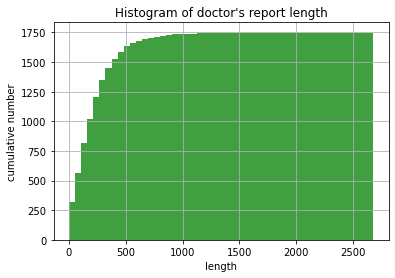

In [57]:
#the histogram of the data
plt.hist(length, 50, density=False, cumulative=True, facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('cumulative number')
plt.title("Histogram of doctor's report length")
plt.grid(True)
plt.show()

Almost all tokenized clinical reports have less than 1000 words. I decide to truncate at this point in order to reduce the loss of information. The sequence length (number of words) in each reports varies, so I will constrain each report to be 1000 words, truncating long report and pad the shorter reports with zero values

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 1000     # Number of word in a report 
PADDING_MODE = 'pre'     #
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc = pad_sequences(X_train_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

In [59]:
X_train_enc.shape

(1748, 1000)

repeat the same operation for the test set  

In [60]:
test=df_test1['text']
test_=test.astype("str")

In [61]:
X_test_enc = tokenizer.texts_to_sequences(test_)

In [62]:
X_test_enc = pad_sequences(X_test_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

In [63]:
X_test_enc.shape

(811, 1000)

Now I have to put together text and numeric information. But of course the dimensionality coming from the text treatment is really high (1000). 
In order to apply a feature selection in which the number of numeric variables and treated text are in the same order of magnitude I apply a PCA dimensionality reduction to treated info from text. 

First I will apply standardization to all variables 

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [65]:
X_train_enc = StandardScaler().fit_transform(X_train_enc)
X_test_enc=StandardScaler().fit_transform(X_test_enc)
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [66]:
X_train1 = pd.DataFrame(X_train_enc)
X_test1=pd.DataFrame(X_test_enc)

Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.
Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.
Third principal component tries to explain the variance which is not explained by the first two principal components and so on. Intuitively the Principal components are in order of importance concerning the amount of variability explained. 

I select the first 10 components and then compute the PCA for Dimensionality Reduction.  

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
#train 
pca_result_train = pca.fit_transform(X_train1.values)

In [68]:
pca_result_train.shape

(1748, 10)

In [69]:
#test
pca_result_test=pca.fit_transform(X_test1.values)


In [70]:
pca_result_test.shape

(811, 10)

## Feature selection for the models

 Now i am ready to put together numeric variables and the information coming from the text (contained in the 10 dimensionality of pca) 

In [71]:
#test
combinedFeatures_test = np.hstack([X_test,pca_result_test])

In [72]:
#train
combinedFeatures_train = np.hstack([X_train,pca_result_train])

In [73]:
#check if test and train have the same shape
combinedFeatures_train.shape,combinedFeatures_test.shape

((1748, 56), (811, 56))

Now that I put together the information, let's perform a feature selection 

Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables. Feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model. Since my target variable is categorical and I am dealing with a classification problem I can take F-test to decide which features are more relevant. I can do that because I have test and train separated from the very beginning, otherwise in case of k-fold cross validation this could be dangerous.  

In [74]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [75]:
X2_train =combinedFeatures_train
X2_test=combinedFeatures_test

In [76]:
X2_train = pd.DataFrame(X2_train)

In [77]:
X2_test = pd.DataFrame(X2_test)

In [78]:
#feature selection 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , f_regression, f_classif
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X2_train, y_train)
# transform train input data
X_train_fs = fs.transform(X2_train)
# transform test input data
X_test_fs = fs.transform(X2_test)
X_selected = fs.fit_transform(X2_train, y_train)
print(X_selected.shape)

(1748, 56)


0 0.008030309472980128
1 13.383016728991114
2 14.31661253868793
3 3.280530678973954
4 56.7773015215178
5 25.947818583381775
6 0.08647269804617015
7 43.9648097707727
8 2.2402905945854292
9 9.585435409249751
10 6.771539669156355
11 0.5101963023331023
12 2.5220046665431286
13 0.2073991781608198
14 4.715234692417951
15 4.015644278363438
16 8.468562079952024
17 6.613564843914502
18 61.84270213852266
19 7.111086612261233
20 0.5066583545549183
21 1.1372998029559604
22 3.966162584136658
23 0.11757779355144009
24 1.518421975345093
25 2.6405922878426216
26 2.640592287842546
27 58.787918533556336
28 42.49832798001906
29 1.7438021490526052
30 54.99953673036694
31 91.35853409114857
32 82.62556028960401
33 48.6961474043799
34 42.749099820748754
35 6.171303136286192
36 86.94233235851813
37 16.650675393297114
38 0.9376145906527381
39 49.59884458434206
40 1.1314315211503296
41 1.1107653536558957
42 61.46283850532506
43 25.74016581465873
44 17.051129349507367
45 10.624277095752225
46 40.29980883511672
4

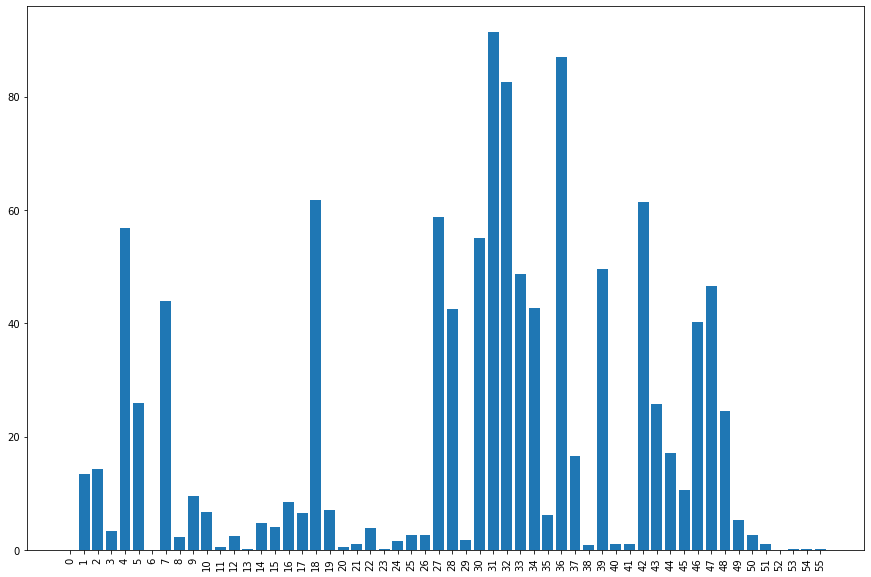

In [79]:
#plot 
for i in range(len(X2_test.columns)):
    print( X2_test.columns[i], fs.scores_[i])
# plot the scores
plt.figure(figsize=(15,10))
plt.bar([i for i in range(len(X2_test.columns))], fs.scores_)
plt.xticks(range(len(X2_test.columns)),X2_test.columns, rotation=90)
plt.show()

select most 21 important features:
- ETH_OTHER/UNKNOWN 
- ETH_BLACK/AFRICAN AMERICAN
- INS_MEDICARE
- DIS_LONG_TERM CARE HOSPITAL 
- DIS_DISC_TRANCANCER/ CHLDRN H 
- Blood
- Circulatory
- Digestive
- Endocrine 
- Genitourinary
- Infectious 
- Injury
- Misc
- Muscular 
- Nervous 
- Respiratory
- Skin 
- Recovery day
- Pca 1 
- Pca 2 
- Pca 3


For my models I will use: 5 dummy variables coming from the categorical variables, 12 variables coming from bag of word representation of diagnosis, the amount of time passed in hospital during the last hospitalization and 3 Principal component of doctor's reports dimensionality reduction.    

In [80]:
X2_train=X2_train[[4,5,7,18,19,27,28,30,31,32,33,34,36,37,39,42,43,44,46,47,48]] 
X2_test=X2_test[[4,5,7,18,19,27,28,30,31,32,33,34,36,37,39,42,43,44,46,47,48]]
 

Before proceding with the algorithms I plot the correlation matrix between the features in order to see if they are low correlated.  

In [81]:
X2_train = pd.DataFrame(X2_train)

<AxesSubplot:>

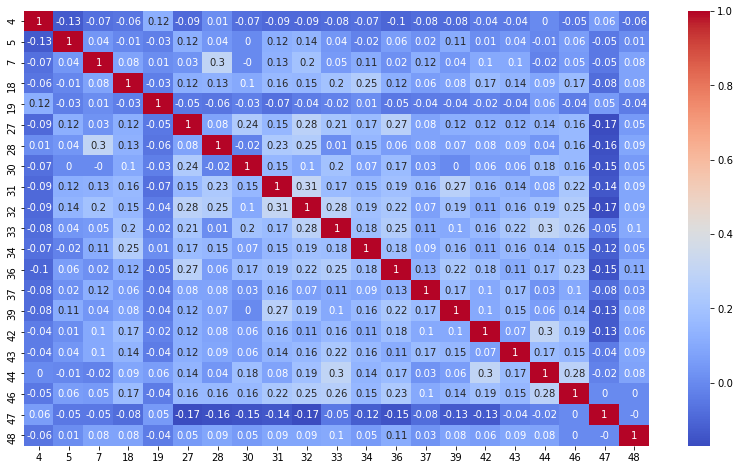

In [82]:
#plot the correlation of independent variables 
# Plot the correlation heatmap
from termcolor import colored as cl
plt.figure(figsize=(14, 8))
corr_matrix = X2_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

features selected are not highly correlated. 

## Models 

In [83]:
from sklearn.metrics import accuracy_score

### Naive Bayes classifier  

Naive Bayes is a conditional probability model it is based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Although the correlation between the input features is low, it is really rare to have the indipendence between features.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of the likehood, in my model I assume that The likelihood of the features is assumed to be Gaussian

- If assumption of independent predictors holds true and assumed probability distributions are true, then a Naive Bayes classifier is the best classifier compared to every other classifier
- Naive bayes is easy to implement and efficient (In a one pass over data you can learn all parameters)
- Handles well small datasets, it is my case since I reduce dimensionality with PCA. 


In [84]:
from sklearn.naive_bayes import  MultinomialNB, GaussianNB, BernoulliNB 

In [85]:
#scale the features between 0 and 1 
X3_train =MinMaxScaler().fit_transform(X2_train)
X3_test=MinMaxScaler().fit_transform(X2_test)

In [86]:
X3_train = pd.DataFrame(X3_train)

In [87]:
X3_test = pd.DataFrame(X3_test)

In [88]:
#assumption of Gaussian distribution for the likehood
nbc_B = GaussianNB()
nbc_B.fit(X3_train,y_train)

GaussianNB()

In [89]:
#train 
nbc_B.score(X3_train, y_train)

0.648741418764302

In [90]:
#prediction on the test set
y_pred_nv_txt_B=nbc_B.predict(X3_test)

In [91]:
#quick look at the metric
accuracy_score(y_test,y_pred_nv_txt_B)

0.6966707768187423

### Logistic regression classifier   

Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function that has a codomain between 0 and 1. 
I want to maximize the likelihood that a random data point gets classified correctly, which is called Maximum Likelihood Estimation. The solver “liblinear” uses a coordinate descent (CD) algorithm, as optimizer. C is the inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization, will give a wider range at the cost of some missclassification.

Like linear regression, logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other. I did it before in the feature selection and showed the correlation map in which features are low correlated. 

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
#compile the model (optimizer and regularization strength, fit_intercept = True by default )
model_txt_B= LogisticRegression(solver='liblinear',C=0.01,random_state=0)

In [94]:
#fit 
model_txt_B.fit(X2_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [95]:
#prediction of test set 
y_pred_log_txt_B=model_txt_B.predict(X2_test)

In [96]:
#quick look at the metric
accuracy_score(y_test,y_pred_log_txt_B)

0.689272503082614

### SVM Classifier

SVMs (support vector machines) are very adaptive, can learn both simple and highly complex classification models. I can obtain a linear separation in a high features space using a Kernel (Kernel trick). SVM have a set of predefined kernels such as linear, sigmoid, radial basis function and polynomial. There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. In order to find the best kernel to my model and tune the best parameters I will implement a gridsearch.   

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.svm import SVC 

An SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. I choose the hyperplane so that the distance from it to the nearest data point on each side is maximized with a little bit of tolerance.
The parameter C, soft margin parameter, indicate the accepting errors: a huge value of C will give the hard margin classifier and tolerates zero constraint violation, but of course I have to keep attention at noisy data in order to avoid their impact on the classifier. The gamma parameter is set to 'auto' in order to specify the kernel coefficient of rbf, sigmoid and poly equal to 1/(n_features) 

In [99]:
#set of possibilities in which search the best one 
param_grid = [{'C': [0.5,0.7, 0.8, 1,1.2,1.4,1.6], 'gamma': ['auto'], 'kernel': ['linear']},
              {'C': [0.5,0.7, 0.8, 1,1.2,1.4,1.6], 'gamma': ['auto'], 'kernel': ['rbf']},
              {'C': [0.5,0.7,0.8, 1,1.2,1.4,1.6], 'gamma': ['auto'], 'kernel': ['sigmoid']},
              {'C': [0.5,0.7,0.8, 1,1.2,1.4,1.6], 'gamma': ['auto'], 'kernel': ['poly'],'degree':[2,3]}
             ]


In [100]:
#search over specified parameter values for an estimator.
# verbose =3 the fold and candidate parameter indexes are also displayed together with the starting time of the computation
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [101]:
#fit the search by default the metric used to evaluate is the accuracy 
grid.fit(X3_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.683, total=   0.1s
[CV] C=0.5, gamma=auto, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.700, total=   0.1s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.674, total=   0.1s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.668, total=   0.1s
[CV] C=0.5, gamma=auto, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.679, total=   0.1s
[CV] C=0.7, gamma=auto, kernel=linear ................................
[CV] .... C=0.7, gamma=auto, kernel=linear, score=0.691, total=   0.1s
[CV] C=0.7, gamma=auto, kernel=linear ................................
[CV] .... C=0.7, gamma=auto, kernel=linear, score=0.689, total=   0.1s
[CV] C=0.7, gamma=auto, kernel=linear ................................
[CV] .... C=0.7, gamma=auto, kernel=linear, score=0.663, total=   0.1s
[CV] C=0.7, gamma=auto, kernel=linear ................................
[CV] .... C=0.7, gamma=auto, kernel=linear, score=0.659, total=   0.1s
[CV] C=0.7, gamma=auto, kernel=linear ................................
[CV] .... C=0.7, gamma=auto, kernel=linear, score=0.685, total=   0.1s
[CV] C=0.8, gamma=auto, kernel=linear ................................
[CV] .... C=0.8, gamma=auto, kernel=linear, score=0.700, total=   0.1s
[CV] C=0.8, gamma=auto, kernel=linear ................................
[CV] .

[CV] ....... C=1.4, gamma=auto, kernel=rbf, score=0.669, total=   0.1s
[CV] C=1.4, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.4, gamma=auto, kernel=rbf, score=0.645, total=   0.1s
[CV] C=1.4, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.4, gamma=auto, kernel=rbf, score=0.676, total=   0.2s
[CV] C=1.6, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.6, gamma=auto, kernel=rbf, score=0.694, total=   0.2s
[CV] C=1.6, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.6, gamma=auto, kernel=rbf, score=0.720, total=   0.2s
[CV] C=1.6, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.6, gamma=auto, kernel=rbf, score=0.677, total=   0.3s
[CV] C=1.6, gamma=auto, kernel=rbf ...................................
[CV] ....... C=1.6, gamma=auto, kernel=rbf, score=0.650, total=   0.3s
[CV] C=1.6, gamma=auto, kernel=rbf ...................................
[CV] .

[CV]  C=0.7, degree=3, gamma=auto, kernel=poly, score=0.569, total=   0.1s
[CV] C=0.7, degree=3, gamma=auto, kernel=poly ........................
[CV]  C=0.7, degree=3, gamma=auto, kernel=poly, score=0.567, total=   0.1s
[CV] C=0.7, degree=3, gamma=auto, kernel=poly ........................
[CV]  C=0.7, degree=3, gamma=auto, kernel=poly, score=0.570, total=   0.1s
[CV] C=0.8, degree=2, gamma=auto, kernel=poly ........................
[CV]  C=0.8, degree=2, gamma=auto, kernel=poly, score=0.569, total=   0.1s
[CV] C=0.8, degree=2, gamma=auto, kernel=poly ........................
[CV]  C=0.8, degree=2, gamma=auto, kernel=poly, score=0.569, total=   0.1s
[CV] C=0.8, degree=2, gamma=auto, kernel=poly ........................
[CV]  C=0.8, degree=2, gamma=auto, kernel=poly, score=0.569, total=   0.1s
[CV] C=0.8, degree=2, gamma=auto, kernel=poly ........................
[CV]  C=0.8, degree=2, gamma=auto, kernel=poly, score=0.567, total=   0.1s
[CV] C=0.8, degree=2, gamma=auto, kernel=poly ...

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   24.5s finished


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.5, 0.7, 0.8, 1, 1.2, 1.4, 1.6],
                          'gamma': ['auto'], 'kernel': ['linear']},
                         {'C': [0.5, 0.7, 0.8, 1, 1.2, 1.4, 1.6],
                          'gamma': ['auto'], 'kernel': ['rbf']},
                         {'C': [0.5, 0.7, 0.8, 1, 1.2, 1.4, 1.6],
                          'gamma': ['auto'], 'kernel': ['sigmoid']},
                         {'C': [0.5, 0.7, 0.8, 1, 1.2, 1.4, 1.6],
                          'degree': [2, 3], 'gamma': ['auto'],
                          'kernel': ['poly']}],
             verbose=3)

In [102]:
print(grid.best_params_)

{'C': 1.2, 'gamma': 'auto', 'kernel': 'rbf'}


In [103]:
#tune the parameters and the kernel according to the searchgrid 
svc_B = SVC(C=1.2,gamma='auto',kernel='rbf')

In [104]:
#fit the model 
svc_B.fit(X3_train,y_train)

SVC(C=1.2, gamma='auto')

In [105]:
#prediction on the test set 
y_pred_svc_txt_B=svc_B.predict(X3_test)

In [106]:
#quick look at the metric
accuracy_score(y_test,y_pred_svc_txt_B)

0.6535141800246609

## Evaluation of the metrics and conclusion 

Although the main metric to evaluate and decide the best model is the accuracy, I will have a look also to the other ones. In particular I will take in account: precision (positive predictive value), recall (true positive rate) and f1_score (sensitivity). In addition I will plot the confusion matrix for each model and the ROC-AUC curve. 
        

In [107]:
from sklearn.metrics import  precision_score, recall_score, plot_confusion_matrix, classification_report 

In [108]:
####ROC Curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [109]:

# evaluation of Naive Bayes 
print("--------------------------------------")
print("Naive Bayes classifier performance for test set  ")
print(classification_report(y_test,y_pred_nv_txt_B))

#evaluation of Logistic regression  

print("--------------------------------------")
print("Logistic regression performance for test set  ")
print(classification_report(y_test,y_pred_log_txt_B))

#evaluation of support vector classifier 
print("--------------------------------------")
print("Support vector classifier for test set  ")
print(classification_report(y_test,y_pred_svc_txt_B))


--------------------------------------
Naive Bayes classifier performance for test set  
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       362
           1       0.71      0.75      0.73       449

    accuracy                           0.70       811
   macro avg       0.69      0.69      0.69       811
weighted avg       0.70      0.70      0.70       811

--------------------------------------
Logistic regression performance for test set  
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       362
           1       0.72      0.72      0.72       449

    accuracy                           0.69       811
   macro avg       0.69      0.69      0.69       811
weighted avg       0.69      0.69      0.69       811

--------------------------------------
Support vector classifier for test set  
              precision    recall  f1-score   support

           0       0.66      0.47   

Text(0.5, 1.0, 'Support vector classifier ')

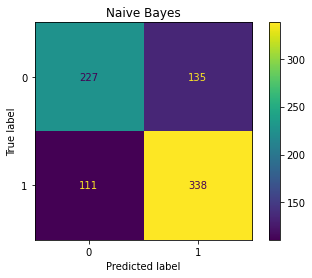

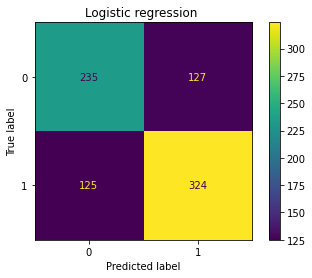

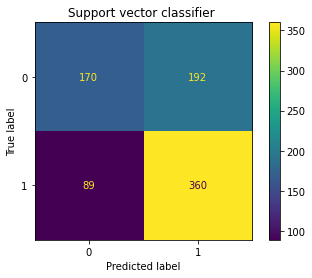

In [110]:
#plot the confusion matrix 
plot_confusion_matrix(nbc_B,X3_test, y_test)  
plt.title('Naive Bayes')

plot_confusion_matrix(model_txt_B,X2_test, y_test)  
plt.title('Logistic regression ')

plot_confusion_matrix(svc_B,X3_test, y_test)  
plt.title('Support vector classifier ')


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.685
nb: ROC AUC=0.690
svm: ROC AUC=0.636


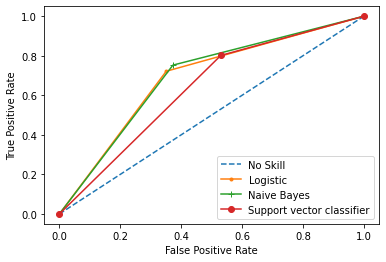

In [111]:
# calculate scores


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred_log_txt_B)
nb_auc=roc_auc_score(y_test,y_pred_nv_txt_B)
svc_auc=roc_auc_score(y_test,y_pred_svc_txt_B)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('nb: ROC AUC=%.3f' % (nb_auc))
print('svm: ROC AUC=%.3f' % (svc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test,y_pred_log_txt_B)
nb_fpr,nb_tpr,_ = roc_curve(y_test,y_pred_nv_txt_B)
svm_fpr,svm_tpr,_ = roc_curve(y_test,y_pred_svc_txt_B)



#6  plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(nb_fpr, nb_tpr, marker='+', label='Naive Bayes')
plt.plot(svm_fpr,svm_tpr, marker='o', label='Support vector classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()




By having a look at the metrics and the plots above I can say that the NaiveBayes and Logistic regression have very similar performance. Although the assumptions for its implementation are not empirically verified The Naive Bayes model has the bigger area under the ROC-AUC curve compared with the others model and the higher accuracy than it is my best model. Regarding the others metrics analyzed for the Naive Bayes model I can say that this model works better in identify RE-HOSPITALIZED patients, with a higher precision and recall with respect to the identification of non RE-HOSPITALIZED patients. Similar behaviour afflict also the logistic regression model.

For support vector machine I obtain really good result in the identification of RE_HOSPITALIZED patients but indeed a really poor result for non RE_HOSPITALIZED patients in which the recall is lower than a random choice model. 

